In [89]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.exposure import cumulative_distribution
from scipy.fft import fft2, ifft2, fftshift, ifftshift
import scipy as sc
from skimage.exposure import match_histograms

In [77]:
def histogramify(image,mode):
    # array with size of bins, set to zeros
    histogram = np.zeros(256)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

def histEqual(image):
    h = histogramify(image,1)
    cum = cumsum(h)
    nj = (cum - cum.min()) * 255
    N = cum.max() - cum.min()
    cum = nj / N
    cum = cum.astype('uint8')
    img_new = cum[image]
    img_new = np.reshape(img_new, image.shape)
    return img_new

In [104]:
a = imread('Images-lab2/city1.jpg')
b = imread('Images-lab2/angiogram-aortic-kidney.tif')
img = imread('Images-lab2/fractal-iris.tif')
city1=imread('Images-lab2/city1.jpg')
city2=imread('Images-lab2/city2.jpg')

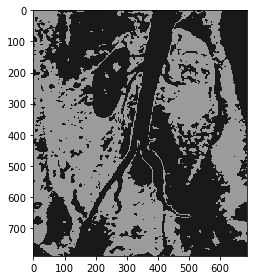

In [87]:
# Highlighting a specific range of gray levels in an image

row, column = b.shape
img1 = np.zeros((row,column),dtype = 'uint8')

min_range = 100
max_range = 150

for i in range(row):
    for j in range(column):
        if b[i,j]>min_range and b[i,j]<max_range:
            img1[i,j] = 155
        else:
            img1[i,j] = 25
imshow(img1)


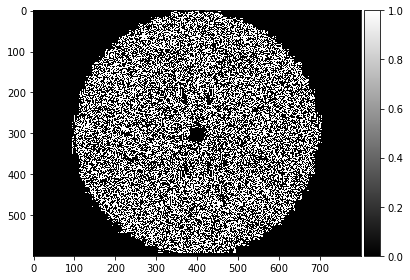

In [101]:
#bit-plane splicing
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits

# We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])

imshow(one_bit_img,cmap='gray')

In [116]:
def print_histogram(_histrogram, name, title):
    plt.figure()
    plt.title(title)
    plt.plot(_histrogram, color='#ef476f')
    plt.bar(np.arange(len(_histrogram)), _histrogram, color='#b7b7a4')
    plt.ylabel('Number of Pixels')
    plt.xlabel('Pixel Value')
    plt.savefig("hist_" + name)


def generate_histogram(img):
    gr_hist = np.zeros([256])
    gr_img = img

    for x_pixel in range(gr_img.shape[0]):
        for y_pixel in range(gr_img.shape[1]):
            pixel_value = int(gr_img[x_pixel, y_pixel])
            gr_hist[pixel_value] += 1
    '''normalize Histogram'''
    #gr_hist /= (gr_img.shape[0] * gr_img.shape[1])


def equalize_histogram(img, histo, L):
    eq_histo = np.zeros_like(histo)
    en_img = np.zeros_like(img)
    for i in range(len(histo)):
        eq_histo[i] = int((L - 1) * np.sum(histo[0:i]))
    print_histogram(eq_histo, name="eq_"+str(index), title="Equalized Histogram")
    '''enhance image as well:'''
    for x_pixel in range(img.shape[0]):
        for y_pixel in range(img.shape[1]):
            pixel_val = int(img[x_pixel, y_pixel])
            en_img[x_pixel, y_pixel] = eq_histo[pixel_val]
    '''creating new histogram'''
    hist_img, _ = generate_histogram(en_img, print=False, index=index)
    return eq_histo


def find_value_target(val, target_arr):
    key = np.where(target_arr == val)[0]

    if len(key) == 0:
        key = find_value_target(val+1, target_arr)
        if len(key) == 0:
            key = find_value_target(val-1, target_arr)
    vvv = key[0]
    return vvv


def match_histogram(inp_img, hist_input, e_hist_input, e_hist_target):
    '''map from e_inp_hist to 'target_hist '''
    en_img = np.zeros_like(inp_img)
    tran_hist = np.zeros_like(e_hist_input)
    for i in range(len(e_hist_input)):
        tran_hist[i] = find_value_target(val=e_hist_input[i], target_arr=e_hist_target)
    print_histogram(tran_hist, name="trans_hist_", title="Transferred Histogram")
    '''enhance image as well:'''
    for x_pixel in range(inp_img.shape[0]):
        for y_pixel in range(inp_img.shape[1]):
            pixel_val = int(inp_img[x_pixel, y_pixel])
            en_img[x_pixel, y_pixel] = tran_hist[pixel_val]
    '''creating new histogram'''
    hist_img = generate_histogram(en_img, print=False, index=3)
    return en_img

In [111]:
histin = generate_histogram(city1)
e_hist_input= equalize_histogram(city1,histin,50)
e_hist_target = equalize_histogram(city2,generate_histogram(city2),50)
a = match_histogram(city1,histin,e_hist_input,e_hist_target)

TypeError: object of type 'NoneType' has no len()

In [117]:
histin = generate_histogram(a)
print(histin)

None
